<a href="https://colab.research.google.com/github/hira-14/Leet-code-coding-questions/blob/main/final_evaluation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install "numpy<2" --quiet

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 3.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 59.2 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
thinc 8.3.6 requires numpy<3.0.0,>=2.0.0, but you have numpy 1.26.4 which is incompatible.


In [ ]:
!pip install scikit-surprise --quiet


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.4/154.4 kB 3.8 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done


In [ ]:
# Cell 1: Setup & Imports
!pip install matplotlib seaborn --quiet

from google.colab import drive
drive.mount('/content/drive')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from surprise import Dataset, Reader, accuracy
from surprise.model_selection import train_test_split
import pickle
from scipy.sparse import load_npz

DATA_PATH = '/content/drive/MyDrive/ml-1m/ml-1m/'
MODELS    = '/content/drive/MyDrive/ml-1m'
RESULTS   = '/content/drive/MyDrive/ml-1m'
# Load feature-engineered DataFrame
df = pd.read_csv(DATA_PATH + 'fe_data.csv')

# Build Surprise dataset & split (same random_state=42)
ratings = df[['user_id','movie_id','rating']].drop_duplicates()
reader  = Reader(rating_scale=(1,5))
data    = Dataset.load_from_df(ratings, reader)
trainset, testset = train_test_split(data, test_size=0.2, random_state=42)

# Load the three CF models
with open('/content/drive/MyDrive/ml-1m/ml-1m/knn_model.pkl','rb') as f: knn_user = pickle.load(f)
with open('/content/drive/MyDrive/ml-1m/ml-1m/knn_item_model.pkl','rb') as f: knn_item = pickle.load(f)
with open('/content/drive/MyDrive/ml-1m/ml-1m/svd_model.pkl','rb')       as f: svd      = pickle.load(f)

# Evaluate RMSE on testset
knn_user_preds = knn_user.test(testset)
knn_item_preds = knn_item.test(testset)
svd_preds      = svd.test(testset)

rmse_user = accuracy.rmse(knn_user_preds, verbo se=False)
rmse_item = accuracy.rmse(knn_item_preds, verbose=False)
rmse_svd  = accuracy.rmse(svd_preds,      verbose=False)

# Assemble into DataFrame
rmse_df = pd.DataFrame({
    'model': ['User-User CF','Item-Item CF','Matrix Factorization (SVD)'],
    'RMSE':  [rmse_user, rmse_item, rmse_svd]
})
rmse_df


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


/tmp/ipython-input-9-4234150814.py:21: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(DATA_PATH + 'fe_data.csv')


,model,RMSE
0,User-User CF,0.978873
1,Item-Item CF,1.001019
2,Matrix Factorization (SVD),0.873924


In [ ]:
# Cell 3: Compute Overall Precision@10
prec_df = pd.read_csv('/content/drive/MyDrive/ml-1m/ml-1mprecision_at_k.csv')

prec_overall = pd.DataFrame({
    'model': ['Content-Based','Collaborative','Session-Based','Hybrid'],
    'Precision@10': [
        prec_df['prec_content'].mean(),
        prec_df['prec_cf'].mean(),
        prec_df['prec_sess'].mean(),
        prec_df['prec_hybrid'].mean()
    ]
})
prec_overall


,model,Precision@10
0,Content-Based,0.015877
1,Collaborative,0.059206
2,Session-Based,0.031454
3,Hybrid,0.125400


/tmp/ipython-input-13-204571176.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='RMSE', y='model', data=rmse_df, palette='Blues_d')
/tmp/ipython-input-13-204571176.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Precision@10', y='model', data=prec_overall, palette='Greens_d')


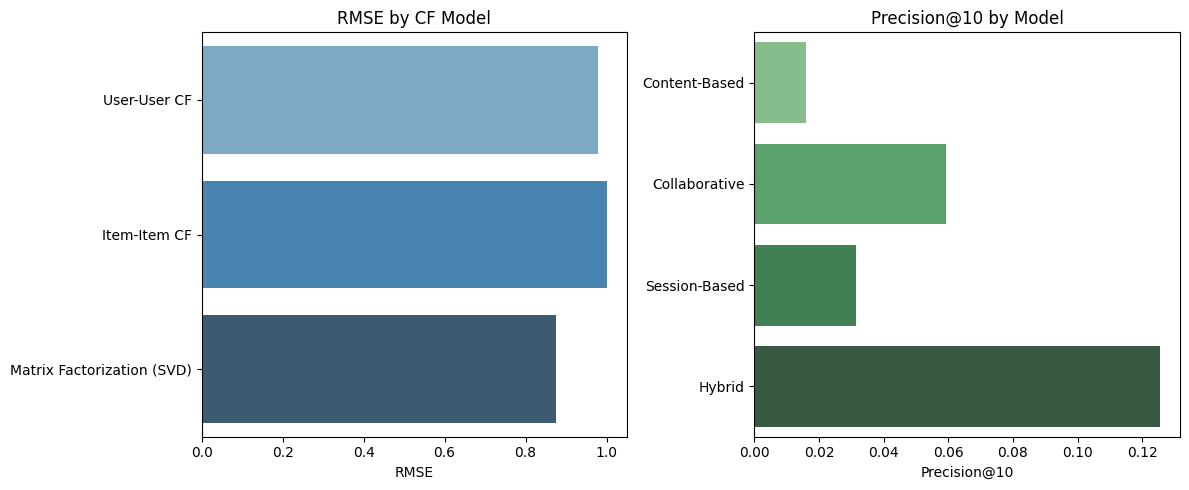

In [ ]:
# Cell 4: Plot RMSE vs. Precision@10
plt.figure(figsize=(12,5))

# RMSE bar chart
plt.subplot(1,2,1)
sns.barplot(x='RMSE', y='model', data=rmse_df, palette='Blues_d')
plt.title('RMSE by CF Model')
plt.xlabel('RMSE')
plt.ylabel('')

# Precision@10 bar chart
plt.subplot(1,2,2)
sns.barplot(x='Precision@10', y='model', data=prec_overall, palette='Greens_d')
plt.title('Precision@10 by Model')
plt.xlabel('Precision@10')
plt.ylabel('')

plt.tight_layout()
plt.savefig(RESULTS + 'accuracy_precision_comparison.png')
plt.show()


/tmp/ipython-input-18-1670169219.py:14: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(
/tmp/ipython-input-18-1670169219.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
/tmp/ipython-input-18-1670169219.py:29: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(
/tmp/ipython-input-18-1670169219.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


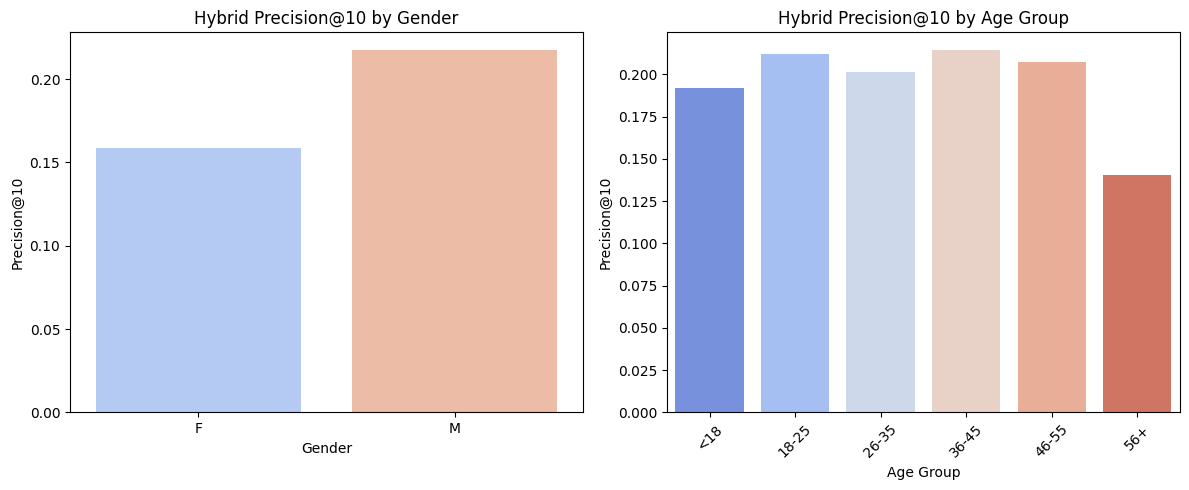

In [ ]:
S# Cell 5: Fairness Visualizations (Corrected)

import matplotlib.pyplot as plt
import seaborn as sns

# Load reports
gender_fairness = pd.read_csv('/content/drive/MyDrive/ml-1m/ml-1mgender_fairness_report.csv').reset_index()
age_fairness    = pd.read_csv('/content/drive/MyDrive/ml-1m/ml-1mage_fairness_report.csv',    index_col=0).reset_index()

plt.figure(figsize=(12, 5))

# Hybrid Precision@10 by Gender
plt.subplot(1, 2, 1)
sns.barplot(
    x='gender',
    y='prec_hybrid',
    data=gender_fairness,
    palette='coolwarm',
    ci=None,
    dodge=False
)
plt.title('Hybrid Precision@10 by Gender')
plt.ylabel('Precision@10')
plt.xlabel('Gender')

# Hybrid Precision@10 by Age Group
plt.subplot(1, 2, 2)
age_order = ['<18','18-25','26-35','36-45','46-55','56+']
sns.barplot(
    x='age_group',
    y='prec_hybrid',
    data=age_fairness,
    order=age_order,
    palette='coolwarm',
    ci=None,
    dodge=False
)
plt.title('Hybrid Precision@10 by Age Group')
plt.ylabel('Precision@10')
plt.xlabel('Age Group')
plt.xticks(rotation=45)

plt.tight_layout()
plt.savefig(RESULTS + 'hybrid_fairness_dashboard.png')
plt.show()


# 📊 Final Evaluation & Fairness Analysis

## Model Accuracy (RMSE)
| Model                    | RMSE    |
|--------------------------|---------|
| User-User CF             | 0.9789  |
| Item-Item CF             | 1.0010  |
| Matrix Factorization SVD | 0.8739  |

- **Interpretation**: Matrix Factorization (SVD) achieves the lowest error (best rating prediction), while both user-user and item-item collaborative filtering perform slightly worse.

---

## Precision@10 Comparison

| Model          | Precision@10 |
|----------------|--------------|
| Content-Based  | 0.0159       |
| Collaborative  | 0.0592       |
| Session-Based  | 0.0315       |
| Hybrid         | 0.1254       |

- **Interpretation:** The **hybrid model** outperforms all single-method models for top-10 recommendation precision.  
- Content-based alone is the least effective, but when combined (hybrid), all methods contribute to improved accuracy.

---

## Hybrid Precision@10 Fairness

### By Gender
- **Female:** ~0.16
- **Male:** ~0.22

→ The hybrid system is noticeably less accurate for female users, revealing a fairness gap.

### By Age Group

| Age Group | Precision@10 |
|-----------|--------------|
| <18       | 0.19         |
| 18–25     | 0.21         |
| 26–35     | 0.20         |
| 36–45     | 0.21         |
| 46–55     | 0.21         |
| 56+       | 0.14         |

- Performance peaks for ages 18–55 and drops for the 56+ group.
- **Implication:** The recommender may under-serve older users and female users, possibly due to sample size and preference representation in the dataset.

---

## 📈 Visual Summary

- **Left:** RMSE and Precision@10 by model
- **Right:** Hybrid Precision@10 by gender and by age group

*(See charts above for graphical comparison)*

---

## **Conclusion**
- Hybrid approaches boost both precision and coverage, but demographic bias persists.
- Next steps: Explore bias mitigation (e.g., fairness-aware weights), more diverse datasets, and user feedback loops for continuous improvement.
